## Applies Deep Learning methods to ePodium dataset for prediction of Dyslexia.

#### Import Packages

In [20]:
import mne
import numpy as np
import os

import PATH

from functions import dataset_loading
from functions import epodium

participant = "111b"

#### Load processed data

In [21]:
standard = "GiepMT_S" # GiepMT_S, GiepST_S, GopMT_S, GopST_S
deviant = "GiepMT_D" # GiepMT_D, 

path_processed_npy = os.path.join(PATH.processed, "ePod_autoreject", participant + ".npy")
path_processed_events = os.path.join(PATH.processed, "ePod_autoreject", "events", participant + ".txt")

npy = np.load(path_processed_npy)
info = mne.create_info(epodium.channel_names, 2048, ch_types='eeg')
events_12 = np.loadtxt(path_processed_events, dtype=int)

epochs = mne.EpochsArray(npy, info, events=events_12, tmin=-0.2, 
                         event_id=epodium.event_dictionary, verbose=False)
montage = mne.channels.make_standard_montage('standard_1020') 
epochs.info.set_montage(montage, on_missing = 'ignore')

print(npy.shape)

(2410, 32, 2049)


#### MMN

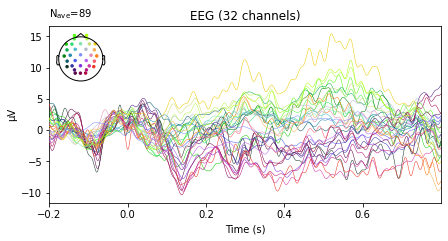

In [22]:
evoked_D = epochs['GiepST_D'].average()
evoked_S = epochs['GiepST_S'].average()
evoked_mmn = mne.combine_evoked([evoked_D, evoked_S], weights = [1, -1])
fig = evoked_mmn.plot(spatial_colors = True)

#### Create Labels